In [1]:
import pandas as pd
from datetime import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('data_test.csv', sep = ';')

In [39]:
def prepare_data(df):
    df['VALUE_DAY'] = pd.to_datetime(df['VALUE_DAY'])
    #markup type of users
    df['IS_ACTIVE'] = 0
    df.loc[df['DIGITAL_30_CNT'].isna() == False , 'IS_ACTIVE'] = 1
    df['IS_DIGITAL'] = 0
    df.loc[df['DIGITAL_30_CNT'] >= 1 , 'IS_DIGITAL'] = 1
    df['IS_TRAN_ACTIVE'] = 0
    df.loc[df['TRAN_ACTIVE_30_CNT'] >= 1 , 'IS_TRAN_ACTIVE'] = 1
    df['IS_OPER_ACTIVE'] = 0
    df.loc[df['OPER_ACTIVE_30_CNT'] >= 1 , 'IS_OPER_ACTIVE'] = 1
    # find first data from users
    start_date_df = df.groupby('CLIENT_ID', as_index = False)['VALUE_DAY'].min() \
    .rename( columns = {'VALUE_DAY':'START_DATE'})
    all_df = pd.merge(df, start_date_df, how = 'left', on = 'CLIENT_ID')
    # find how many month have passed since start date
    all_df['MONTHS'] = (all_df['VALUE_DAY'].dt.year - all_df['START_DATE'].dt.year) * 12 \
    + (all_df['VALUE_DAY'].dt.month - all_df['START_DATE'].dt.month)
#     all_df['START_DATE'] = all_df['START_DATE'].astype('str')
    return all_df

In [40]:
def get_cohort_df(df, type_client):
    group_df = df.groupby(['START_DATE','MONTHS'], as_index = False)[type_client].sum()
    cohort_data = group_df.pivot(index='START_DATE', columns='MONTHS', values=type_client)
    base = cohort_data[0]
    retention = cohort_data.divide(base, axis=0).round(2)
    return retention

In [41]:
def get_hit_map(table, type_client):
    plt.figure(figsize=(10,8))
    plt.title('Retention for : {}'.format(type_client))
    ax = sns.heatmap(data=table, annot=True, fmt='.0%')
    ax.set_yticklabels(table.index)
    fig=ax.get_figure()
    plt.show()

In [42]:
raw_df = prepare_data(df)

In [46]:
types_list = raw_df.columns[-6:-2].to_list()

In [47]:
types_list

['IS_ACTIVE', 'IS_DIGITAL', 'IS_TRAN_ACTIVE', 'IS_OPER_ACTIVE']

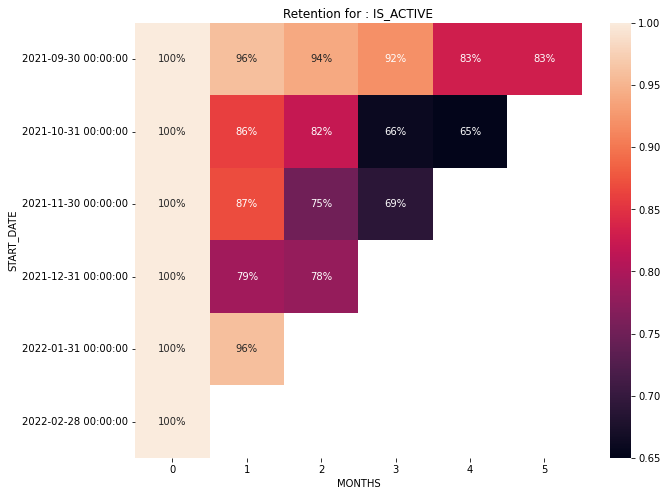

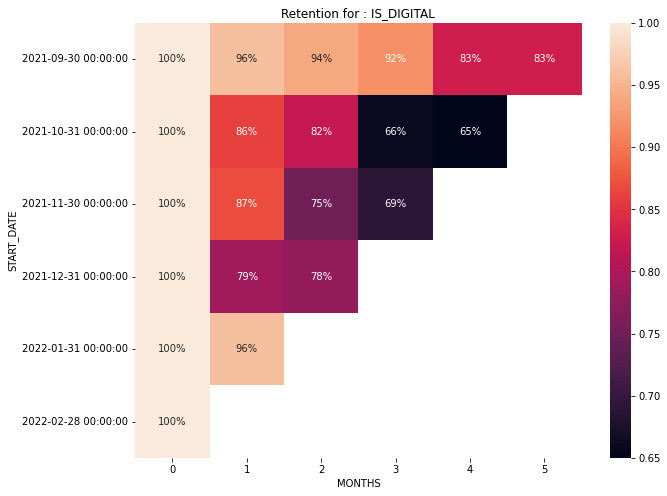

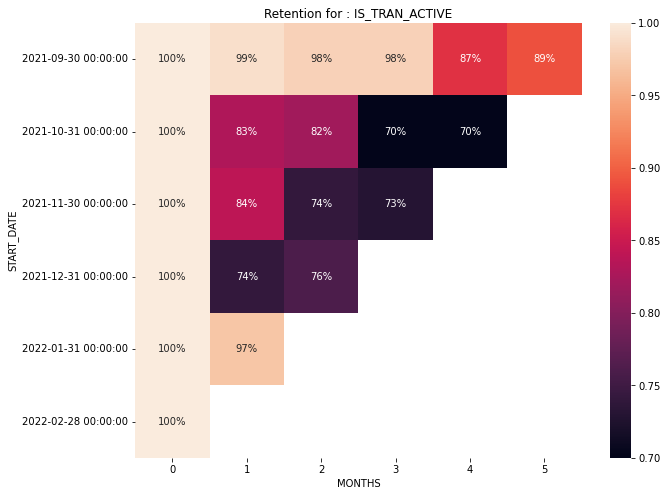

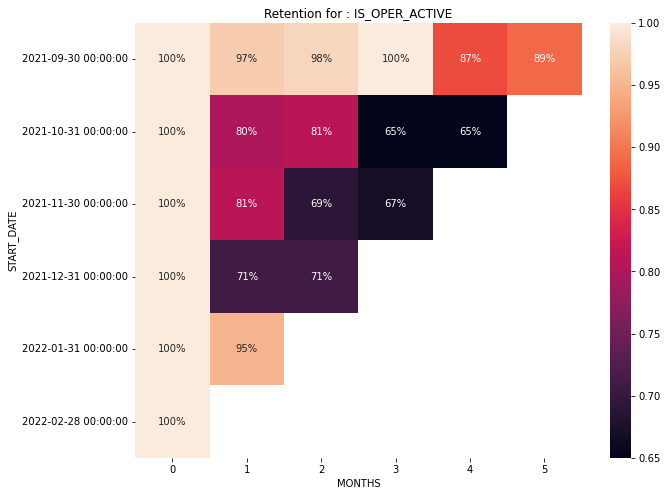

In [48]:
for users_type in types_list:
    type_df = get_cohort_df(raw_df, users_type)
    get_hit_map(type_df, users_type)

In [44]:
raw_df.groupby('START_DATE')['IS_ACTIVE'].sum()

START_DATE
2021-09-30    620043
2021-10-31     25718
2021-11-30     17821
2021-12-31     16311
2022-01-31     26349
2022-02-28      4927
Name: IS_ACTIVE, dtype: int64

In [45]:
raw_df.groupby('START_DATE')['IS_DIGITAL'].sum()

START_DATE
2021-09-30    617970
2021-10-31     25580
2021-11-30     17737
2021-12-31     16221
2022-01-31     26279
2022-02-28      4892
Name: IS_DIGITAL, dtype: int64